In [1]:
import numpy as np

In [2]:
label = np.load("/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/labels/700000_1638000_56.npy")

In [3]:
label

array([], dtype=float64)

In [4]:
import os
labels_dir = "/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/labels/"
for file_name in os.listdir(labels_dir):
    file_path = labels_dir + file_name
    label = np.load(file_path)
    print(label)
    print(label.shape)

[]
(0,)
[]
(0,)
[]
(0,)
[]
(0,)
[]
(0,)
[]
(0,)
[[142.  26. 173.  63.]
 [185.  52. 222.  86.]
 [168. 103. 181. 115.]
 [151. 183. 167. 197.]
 [245. 242. 250. 250.]
 [154.  91. 155.  92.]
 [140.  83. 164. 107.]
 [ 48. 185.  66. 204.]
 [ 92. 212.  93. 213.]
 [ 68. 204. 102. 233.]
 [139. 238. 163. 250.]]
(11, 4)
[]
(0,)
[]
(0,)
[]
(0,)
[]
(0,)
[]
(0,)
[[57.  0. 85. 38.]]
(1, 4)
[[173. 123. 236. 180.]]
(1, 4)
[]
(0,)
[]
(0,)
[[ 11.  46.  34.  68.]
 [ 36.  57.  60.  80.]
 [119.  66. 172. 109.]
 [ 24. 110.  66. 149.]]
(4, 4)
[]
(0,)
[[216.  46. 247.  84.]]
(1, 4)
[]
(0,)
[[204.   0. 232.  14.]
 [116.   0. 143.  16.]
 [224.  46. 250.  93.]
 [161.  28. 200. 117.]
 [ 99.  69. 123.  91.]
 [  9. 122.  40. 149.]]
(6, 4)
[]
(0,)
[]
(0,)
[]
(0,)
[]
(0,)
[]
(0,)
[]
(0,)
[]
(0,)
[[ 16.  94.  31. 109.]
 [ 41.  82.  81. 122.]
 [  0. 138.  10. 164.]
 [ 87. 181. 123. 219.]]
(4, 4)
[]
(0,)
[]
(0,)
[[146.  18. 176.  45.]
 [105.  45. 162. 111.]
 [ 64. 113.  65. 114.]
 [ 30.  96. 137. 148.]
 [157. 137. 189. 16

In [5]:
import sys
sys.path.append("../src/")
from run_training_pipeline import download_data, prepare_data, instantiate_lightning_module, instantiate_model, intantiate_dataloader, instantiate_trainer

In [6]:
import yaml
from yaml.loader import SafeLoader

with open("../config.yml") as f:
    config = yaml.load(f, Loader=SafeLoader)
config

{'donnees': {'source train': 'PLEIADES',
  'dataset': 'object_detection',
  'task': 'detection',
  'year': [2022],
  'dep': ['972'],
  'type labeler': 'BDTOPO',
  'buffer size': 10,
  'n channels train': 6,
  'n bands': 3,
  'tile size': 250,
  'augmentation': True},
 'optim': {'loss': 'crossentropy',
  'lr': 0.0001,
  'momentum': 0.9,
  'module': 'fasterrcnn',
  'batch size': 5,
  'max epochs': 100,
  'val prop': 0.2},
 'mlflow': False}

In [7]:
model = instantiate_model(config)
model

FasterRCNNModule(
  (model): FasterRCNN(
    (transform): GeneralizedRCNNTransform(
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        Resize(min_size=(800,), max_size=1333, mode='bilinear')
    )
    (backbone): BackboneWithFPN(
      (body): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): FrozenBatchNorm2d(64, eps=0.0)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): FrozenBatchNorm2d(64, eps=0.0)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): FrozenBatchNorm2d(64, eps=0.0)
            (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
         

In [8]:
from pathlib import Path

list_path_images = []
list_path_labels = []
for name in os.listdir("/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/images/"):
    npy_name = Path(name).stem + ".npy"
    if os.path.exists("/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/labels/" + npy_name):
        list_path_images.append("/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/images/" + name)
        list_path_labels.append("/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/labels/" + npy_name)

list_path_images[:10]

['/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/images/716500_1611000_60.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/images/720500_1616250_44.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/images/700375_1638625_19.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/images/709250_1637625_18.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/images/726750_1621750_14.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/images/720500_1625875_4.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/images/716500_1611250_44.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/images/720500_1616125_52.jp2',
 '/home/o

In [9]:
import shutil

list_path_images = []
list_path_labels = []
for name in os.listdir("/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/images/"):
    npy_name = Path(name).stem + ".npy"
    if os.path.exists("/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/labels/" + npy_name):
        shutil.copyfile(
            "/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/images/" + name,
            "/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/" + name
        )
        shutil.copyfile(
            "/home/onyxia/work/detection-habitat-spontane/train_data-PLEIADES-BDTOPO-detection-972-2022/labels/" + npy_name,
            "/home/onyxia/work/detection-habitat-spontane/train_data_notebook/labels/" + npy_name
        )
        list_path_images.append("/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/" + name)
        list_path_labels.append("/home/onyxia/work/detection-habitat-spontane/train_data_notebook/labels/" + npy_name)

list_path_images[:10]

['/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/716500_1611000_60.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/720500_1616250_44.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/700375_1638625_19.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/709250_1637625_18.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/726750_1621750_14.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/720500_1625875_4.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/716500_1611250_44.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/720500_1616125_52.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/720625_1625000_61.jp2',
 '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/716375_1615625_19.jp2']

In [10]:
from run_training_pipeline import intantiate_dataset

full_dataset = intantiate_dataset(
    config, list_path_images, list_path_labels
)

In [11]:
len(full_dataset)

832

In [12]:
import torch

sample_idx = torch.randint(len(full_dataset), size=(1,)).item()
img, label, metadata = full_dataset[sample_idx]

In [13]:
img.shape

torch.Size([3, 250, 250])

In [14]:
model.eval()
model(img.unsqueeze(0))

[{'boxes': tensor([[2.0799e+02, 0.0000e+00, 2.1079e+02, 2.5000e+02],
          [1.8890e+02, 0.0000e+00, 1.9146e+02, 2.5000e+02],
          [2.4976e+02, 0.0000e+00, 2.5000e+02, 2.5000e+02],
          [4.8323e+01, 5.6248e+01, 2.5000e+02, 1.7470e+02],
          [2.4048e+02, 1.4700e+02, 2.4131e+02, 2.5000e+02],
          [1.6475e+02, 0.0000e+00, 1.6709e+02, 2.5000e+02],
          [0.0000e+00, 2.0440e+01, 2.5000e+02, 2.4214e+02],
          [2.2754e+02, 4.1548e+01, 2.3164e+02, 2.5000e+02],
          [2.1261e+02, 0.0000e+00, 2.1582e+02, 2.5000e+02],
          [1.8367e+02, 0.0000e+00, 1.8552e+02, 2.5000e+02],
          [2.4516e+02, 0.0000e+00, 2.4865e+02, 2.5000e+02],
          [1.0635e+02, 0.0000e+00, 1.0929e+02, 2.5000e+02],
          [1.9289e+02, 0.0000e+00, 1.9747e+02, 2.5000e+02],
          [1.9047e+02, 0.0000e+00, 1.9145e+02, 2.5000e+02],
          [7.9765e+01, 0.0000e+00, 8.0492e+01, 2.5000e+02],
          [7.9475e+01, 0.0000e+00, 8.1744e+01, 2.5000e+02],
          [1.9701e+02, 0.0000e+

In [15]:
img.shape

torch.Size([3, 250, 250])

In [16]:
label.shape

torch.Size([0, 4])

In [17]:
label

tensor([], size=(0, 4), dtype=torch.int64)

In [18]:
model.model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [19]:
model.train()

targets = []
imgs = []

target = {}
target["boxes"] = label
target["labels"] = torch.ones(len(target["boxes"])).long()
targets.append(target)
imgs.append(img)

In [20]:
targets

[{'boxes': tensor([], size=(0, 4), dtype=torch.int64),
  'labels': tensor([], dtype=torch.int64)}]

In [21]:
loss_dict = model.model(imgs, targets)

In [22]:
loss_dict

{'loss_classifier': tensor(2.1862, grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0., grad_fn=<DivBackward0>),
 'loss_objectness': tensor(59.4727, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0., grad_fn=<DivBackward0>)}

In [23]:
# fasterrcnn takes both images and targets for training, returns
loss = sum(loss for loss in loss_dict.values())
{"loss": loss, "log": loss_dict}

{'loss': tensor(61.6590, grad_fn=<AddBackward0>),
 'log': {'loss_classifier': tensor(2.1862, grad_fn=<NllLossBackward0>),
  'loss_box_reg': tensor(0., grad_fn=<DivBackward0>),
  'loss_objectness': tensor(59.4727, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  'loss_rpn_box_reg': tensor(0., grad_fn=<DivBackward0>)}}

In [24]:
list_output_dir = ["/home/onyxia/work/detection-habitat-spontane/train_data_notebook"]
train_dl, valid_dl, test_dl = intantiate_dataloader(
    config, list_output_dir
)

In [25]:
train_dl

In [26]:
a = next(iter(train_dl))

In [27]:
len(a)

3

In [28]:
a[0].shape

torch.Size([5, 3, 250, 250])

In [29]:
a[1]

[tensor([[ 38.0000,  16.0000,  74.0000,  58.0000],
         [169.0000,  23.0000, 196.0000,  59.0000],
         [125.0000,  55.0000, 163.0000,  93.0000],
         [ 57.0000,  82.0000,  78.0000, 115.0000],
         [ 89.0000,  88.0000, 118.0000, 120.0000],
         [ 91.0000, 129.0000, 115.0000, 153.0000],
         [207.0000, 141.0000, 232.0000, 168.0000],
         [ 28.0000,   0.0000,  40.0000,  14.0000],
         [  5.0000,   2.0000,  28.0000,  38.0000],
         [  0.0000,  72.0000,  24.0000,  93.0000],
         [  0.0000,  93.0000,   6.0000, 106.0000],
         [ 10.0000, 143.0000,  24.0000, 157.0000],
         [  0.0000, 144.0000,  12.0000, 176.0000],
         [  2.0000, 158.0000,  31.0000, 192.0000]], dtype=torch.float64),
 tensor([], size=(0, 4), dtype=torch.int64),
 tensor([[ 22.0000,  90.0000,  99.0000, 162.0000]], dtype=torch.float64),
 tensor([[139.0000,   0.0000, 149.0000,   2.0000],
         [107.0000,  18.0000, 143.0000,  51.0000],
         [242.0000,  78.0000, 250.0000, 10

In [30]:
a[2]

[{'pathimage': '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/720125_1616750_9.jp2',
  'pathlabel': '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/labels/720125_1616750_9.npy'},
 {'pathimage': '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/716500_1615875_4.jp2',
  'pathlabel': '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/labels/716500_1615875_4.npy'},
 {'pathimage': '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/720500_1625625_20.jp2',
  'pathlabel': '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/labels/720500_1625625_20.npy'},
 {'pathimage': '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/717125_1624875_1.jp2',
  'pathlabel': '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/labels/717125_1624875_1.npy'},
 {'pathimage': '/home/onyxia/work/detection-habitat-spontane/train_data_notebook/images/720500_1625250_44.

Sanity checks

In [31]:
import random
img, bboxes, metadata = full_dataset[random.randint(0, len(full_dataset))]

In [32]:
img = img.numpy()

In [33]:
bboxes

tensor([], size=(0, 4), dtype=torch.int64)

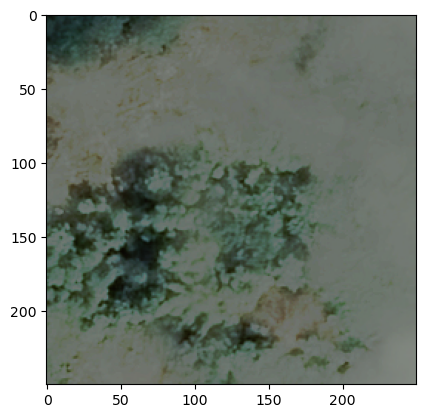

In [34]:
from matplotlib import pyplot as plt
plt.imshow(np.transpose(img.astype(int), (1, 2, 0)))
plt.show()

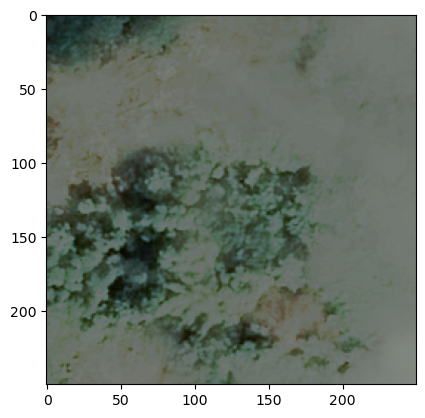

In [35]:
plt.imshow(np.transpose(img / 255., (1, 2, 0)))
plt.show()

In [36]:
img.shape

(3, 250, 250)

In [37]:
img.astype(np.uint8)

array([[[ 18,  18,  14, ..., 116, 116, 116],
        [ 22,  19,  14, ..., 116, 116, 116],
        [ 26,  22,  17, ..., 116, 116, 116],
        ...,
        [104, 104, 104, ..., 130, 130, 130],
        [104, 103, 103, ..., 130, 130, 131],
        [104, 104, 105, ..., 130, 130, 131]],

       [[ 32,  29,  23, ..., 123, 123, 123],
        [ 36,  29,  22, ..., 123, 123, 123],
        [ 41,  32,  27, ..., 123, 123, 123],
        ...,
        [113, 113, 113, ..., 135, 136, 136],
        [113, 113, 113, ..., 135, 136, 136],
        [113, 113, 114, ..., 135, 136, 136]],

       [[ 21,  19,  13, ..., 117, 117, 117],
        [ 28,  20,  12, ..., 117, 117, 117],
        [ 36,  26,  18, ..., 117, 117, 117],
        ...,
        [104, 103, 103, ..., 128, 129, 129],
        [104, 102, 100, ..., 128, 130, 130],
        [103, 103, 103, ..., 128, 130, 130]]], dtype=uint8)

In [38]:
img.astype(np.uint8).dtype

dtype('uint8')

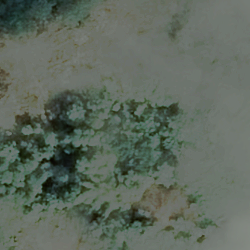

In [39]:
from PIL import Image
image = Image.fromarray(np.transpose(img.astype(np.uint8), (1, 2, 0)), mode="RGB")
image

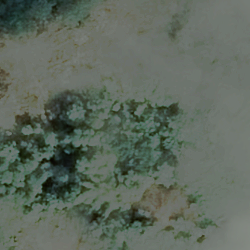

In [40]:
from PIL import ImageFont, ImageDraw, ImageEnhance

for (x, y, xx, yy) in bboxes:
    c1 = (int(x.item()), int(y.item()))
    c2 = (int(xx.item()), int(yy.item()))
    draw = ImageDraw.Draw(image)
    draw.rectangle((c1, c2))

image

Train

In [41]:
model = instantiate_model(config)

In [42]:
model

FasterRCNNModule(
  (model): FasterRCNN(
    (transform): GeneralizedRCNNTransform(
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        Resize(min_size=(800,), max_size=1333, mode='bilinear')
    )
    (backbone): BackboneWithFPN(
      (body): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): FrozenBatchNorm2d(64, eps=0.0)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): FrozenBatchNorm2d(64, eps=0.0)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): FrozenBatchNorm2d(64, eps=0.0)
            (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
         

In [43]:
light_module = instantiate_lightning_module(config, model)
light_module

DetectionModule(
  (model): FasterRCNNModule(
    (model): FasterRCNN(
      (transform): GeneralizedRCNNTransform(
          Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
          Resize(min_size=(800,), max_size=1333, mode='bilinear')
      )
      (backbone): BackboneWithFPN(
        (body): IntermediateLayerGetter(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (relu): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): FrozenBatchNorm2d(64, eps=0.0)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): FrozenBatchNorm2d(64, eps=0.0)
              (conv3): Conv2d(6

In [44]:
trainer = instantiate_trainer(config, light_module)
trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/mamba/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(


In [45]:
trainer.fit(light_module, train_dl, valid_dl)


  | Name  | Type             | Params
-------------------------------------------
0 | model | FasterRCNNModule | 41.3 M
1 | loss  | CrossEntropy     | 0     
-------------------------------------------
41.1 M    Trainable params
222 K     Non-trainable params
41.3 M    Total params
165.197   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/opt/mamba/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 56 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


tensor([], size=(0, 4), dtype=torch.int64)
tensor([[4.3036e+01, 1.1277e+02, 1.0542e+02, 2.3934e+02],
        [3.4469e+01, 3.2060e+01, 1.7078e+02, 2.4146e+02],
        [1.2040e+02, 1.7057e+02, 1.3615e+02, 1.9516e+02],
        [0.0000e+00, 1.3933e+02, 1.3003e+02, 2.0099e+02],
        [0.0000e+00, 8.5103e+01, 8.9695e+01, 2.5000e+02],
        [2.4631e+01, 1.3031e+02, 1.7856e+02, 2.4984e+02],
        [0.0000e+00, 1.4029e+02, 6.8263e+01, 1.6462e+02],
        [0.0000e+00, 9.6982e+01, 2.4259e+02, 1.8720e+02],
        [0.0000e+00, 8.0028e+01, 1.4271e+02, 2.0125e+02],
        [1.1495e+02, 1.9073e+02, 1.4391e+02, 2.3017e+02],
        [0.0000e+00, 5.1221e+01, 7.9328e+01, 7.2036e+01],
        [1.1383e+02, 1.7110e+02, 1.3378e+02, 1.8953e+02],
        [0.0000e+00, 1.2707e+02, 3.6666e+01, 2.4838e+02],
        [1.7773e+02, 4.5407e+01, 1.9289e+02, 6.9665e+01],
        [1.5836e+02, 6.4669e+01, 2.4467e+02, 8.6667e+01],
        [3.2665e+00, 1.3511e+02, 1.0385e+02, 1.5705e+02],
        [0.0000e+00, 9.3617e+

/opt/mamba/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:76: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 5. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(


tensor([], size=(0, 4), dtype=torch.int64)
tensor([[  0.0000, 129.4074, 123.8213, 181.6330],
        [  0.0000,  98.5594, 138.6802, 152.5433],
        [  0.0000, 103.9459, 100.9369, 214.7960],
        [  0.0000, 149.7959, 131.0164, 199.0805],
        [  0.0000, 169.0058, 141.6831, 220.6829],
        [  0.0000,  54.0134, 104.2772, 168.5905],
        [  0.0000, 144.7621,  82.8391, 239.1508],
        [128.6173, 104.7139, 238.4278, 214.2860],
        [124.9285, 139.4656, 238.1309, 191.3978],
        [ 99.8759,  89.4250, 234.8123, 140.8319],
        [116.3103,  62.4891, 236.4003, 176.8178],
        [  0.0000,  71.6843, 123.3989, 121.3221],
        [104.2523,  69.9213, 235.5292, 120.4936],
        [122.0842, 157.7152, 238.9252, 212.0331],
        [  1.4902, 200.7000,   4.2259, 204.7599],
        [ 97.1391, 119.5141, 235.9261, 169.7708],
        [  1.2055, 202.8374,   4.5632, 206.4278],
        [ 82.9128,  14.1087, 232.7296, 127.5993],
        [ 90.7070,  20.2129, 232.8448,  71.7035],
       

/opt/mamba/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 56 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

/opt/mamba/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py:52: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
